In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [183]:
df = pd.read_csv('train.csv')

In [184]:
df.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [187]:
df['month'] = df['time'].apply(lambda row: row.split('-')[1][:2] )
df['day'] = df['time'].apply(lambda row: row.split('-')[2][:2] )
df['hour'] = df['time'].apply(lambda row: row.split(':')[0][-2:] )

df.drop(['time'], axis=1, inplace=True)
df.head()

,row_id,x,y,direction,congestion,month,day,hour
0,0,0,0,EB,70,04,01,00
1,1,0,0,NB,49,04,01,00
2,2,0,0,SB,24,04,01,00
3,3,0,1,EB,18,04,01,00
4,4,0,1,NB,60,04,01,00


In [189]:
df2 = df.groupby('month').mean()
df2

,row_id,x,y,congestion
month,,,,
04,69939.5,1.138462,1.630769,48.007206
05,212159.5,1.138462,1.630769,47.688178
06,354509.5,1.138462,1.630769,47.520815
07,497022.0,1.138462,1.630769,47.802174
08,641289.5,1.138462,1.630769,48.055447
09,780974.5,1.138462,1.630769,47.816851


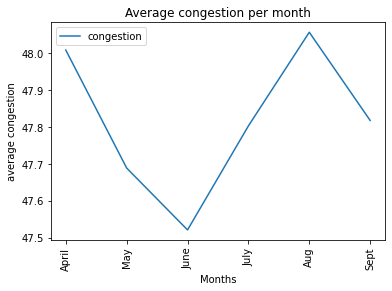

In [190]:
df2.plot(y='congestion', use_index=True)
plt.title('Average congestion per month')
plt.xlabel('Months')
plt.ylabel('average congestion')
#plt.yticks(np.arange(0,50,10))
#df2.congestion.plot()
#df2.congestion.plot(kind='bar')
labels = ['April', 'May', 'June', 'July', 'Aug', 'Sept']
plt.xticks([0,1,2,3,4,5],labels, rotation='vertical')
plt.show()

In [191]:
df4 = df.groupby('direction').mean()
df4

,row_id,x,y,congestion
direction,,,,
EB,424411.083333,1.000000,1.500000,49.571171
NB,424412.083333,1.000000,1.500000,51.853913
NE,424421.428571,1.285714,2.000000,39.971251
NW,424435.000000,2.000000,1.500000,27.188912
SB,424413.833333,1.000000,1.500000,53.716332
SE,424437.000000,2.000000,1.500000,34.859637
SW,424424.000000,1.285714,2.000000,42.019538
WB,424418.090909,1.090909,1.636364,49.842289


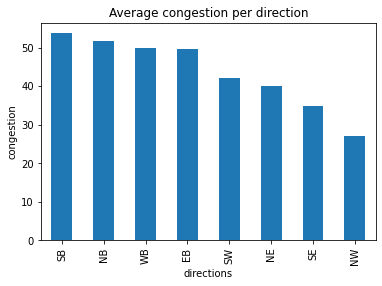

In [221]:
#df4.plot(y='congestion', use_index=True)
df4 = df4.sort_values('congestion',ascending=False)
df4.congestion.plot(kind='bar')
plt.title('Average congestion per direction')
plt.xlabel('directions')
plt.ylabel('congestion')
plt.yticks(np.arange(0,60,10))
plt.show()

In [193]:
df.head()

,row_id,x,y,direction,congestion,month,day,hour
0,0,0,0,EB,70,04,01,00
1,1,0,0,NB,49,04,01,00
2,2,0,0,SB,24,04,01,00
3,3,0,1,EB,18,04,01,00
4,4,0,1,NB,60,04,01,00


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   x           848835 non-null  int64 
 2   y           848835 non-null  int64 
 3   direction   848835 non-null  object
 4   congestion  848835 non-null  int64 
 5   month       848835 non-null  object
 6   day         848835 non-null  object
 7   hour        848835 non-null  object
dtypes: int64(4), object(4)
memory usage: 51.8+ MB


In [195]:
df.describe()

,row_id,x,y,congestion
count,848835.000000,848835.000000,848835.000000,848835.000000
mean,424417.000000,1.138462,1.630769,47.815305
std,245037.702211,0.801478,1.089379,16.799392
min,0.000000,0.000000,0.000000,0.000000
25%,212208.500000,0.000000,1.000000,35.000000
50%,424417.000000,1.000000,2.000000,47.000000
75%,636625.500000,2.000000,3.000000,60.000000
max,848834.000000,2.000000,3.000000,100.000000


Text(0, 0.5, 'frequency')

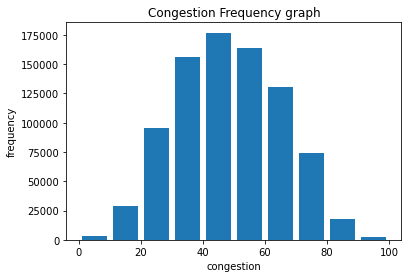

In [196]:
plt.hist(df.congestion, bins = 10, rwidth = 0.8)
plt.title('Congestion Frequency graph')
plt.xlabel('congestion')
plt.ylabel('frequency')

#try groupby hour??

#### Split time data to give us hours, day and month and minutes? (for 20min period??)

In [197]:
df.head(1)

,row_id,x,y,direction,congestion,month,day,hour
0,0,0,0,EB,70,04,01,00


In [198]:
df.groupby(['direction']).mean()

,row_id,x,y,congestion
direction,,,,
EB,424411.083333,1.000000,1.500000,49.571171
NB,424412.083333,1.000000,1.500000,51.853913
NE,424421.428571,1.285714,2.000000,39.971251
NW,424435.000000,2.000000,1.500000,27.188912
SB,424413.833333,1.000000,1.500000,53.716332
SE,424437.000000,2.000000,1.500000,34.859637
SW,424424.000000,1.285714,2.000000,42.019538
WB,424418.090909,1.090909,1.636364,49.842289


In [199]:
#f1 = df.time[0]
#f1[0:13]

In [200]:
#df['time'] = df['time'].apply(lambda row: row[0:10] )

In [201]:
#df.index = pd.DatetimeIndex(df.time)

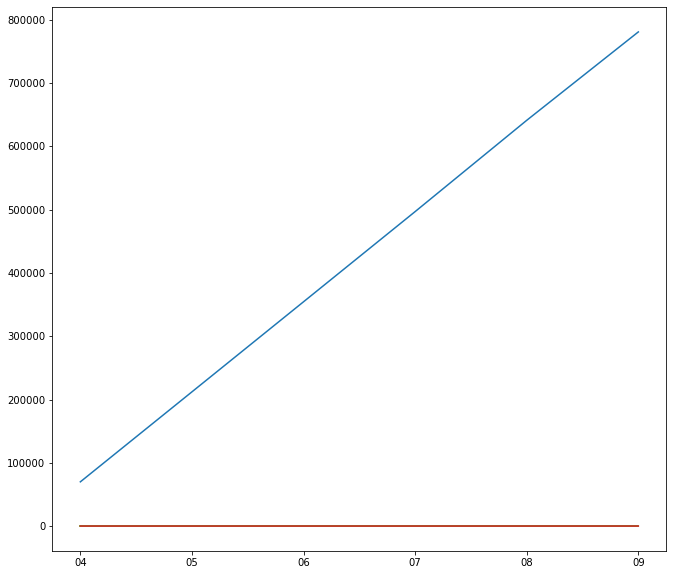

In [204]:
#df.congestion.plot()
#df.plot(x='time', y='congestion')
#df['congestion'].plot(linewidth=0.5)1991-04-01 00:00:00	
fig, ax = plt.subplots(figsize=(11, 10))
ax.plot(df2)
#ax.plot(df.loc['1991-05-01 00':'1991-06-01 00', 'congestion'])
#ax.plot(df.loc['1991-05-01 00':'1991-06-01 00', 'congestion'])

In [205]:
df.month.unique()

array(['04', '05', '06', '07', '08', '09'], dtype=object)

<AxesSubplot:>

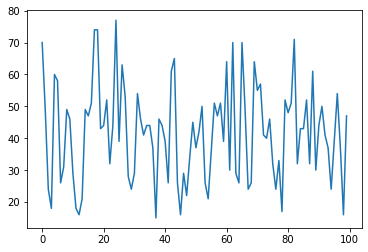

In [206]:
df.congestion[0:100].plot()

In [207]:
df.groupby('day').mean()


,row_id,x,y,congestion
day,,,,
01,357586.166667,1.138462,1.630769,47.813818
02,362266.166667,1.138462,1.630769,47.245085
03,366946.166667,1.138462,1.630769,48.350214
04,374629.288732,1.138462,1.630769,47.104623
05,376241.166667,1.138462,1.630769,47.835256
06,380921.166667,1.138462,1.630769,47.665135
07,385601.166667,1.138462,1.630769,46.851923
08,389273.918605,1.138462,1.630769,47.291843
09,394939.500000,1.138462,1.630769,47.905912


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   x           848835 non-null  int64 
 2   y           848835 non-null  int64 
 3   direction   848835 non-null  object
 4   congestion  848835 non-null  int64 
 5   month       848835 non-null  object
 6   day         848835 non-null  object
 7   hour        848835 non-null  object
dtypes: int64(4), object(4)
memory usage: 51.8+ MB


##### make year, month, hour integer values?

In [209]:
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['hour'] = df['hour'].astype(int)

categorical variable - direction, use OHE or something else as it may create too many columns?

In [210]:
df.direction.value_counts() # categorical encoding

EB    156708
SB    156708
NB    156708
WB    143649
SW     91413
NE     91413
SE     26118
NW     26118
Name: direction, dtype: int64

In [211]:
df = pd.get_dummies(df)

In [212]:
#df['xy'] = df['x']*df['y']
#df = df.drop(['x','y'], axis=1)
#df['x_y_direction'] = df['x']*df['y']*df['direction']

In [213]:
df.head()

,row_id,x,y,congestion,month,day,hour,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,direction_SW,direction_WB
0,0,0,0,70,4,1,0,1,0,0,0,0,0,0,0
1,1,0,0,49,4,1,0,0,1,0,0,0,0,0,0
2,2,0,0,24,4,1,0,0,0,0,0,1,0,0,0
3,3,0,1,18,4,1,0,1,0,0,0,0,0,0,0
4,4,0,1,60,4,1,0,0,1,0,0,0,0,0,0


#### correlation

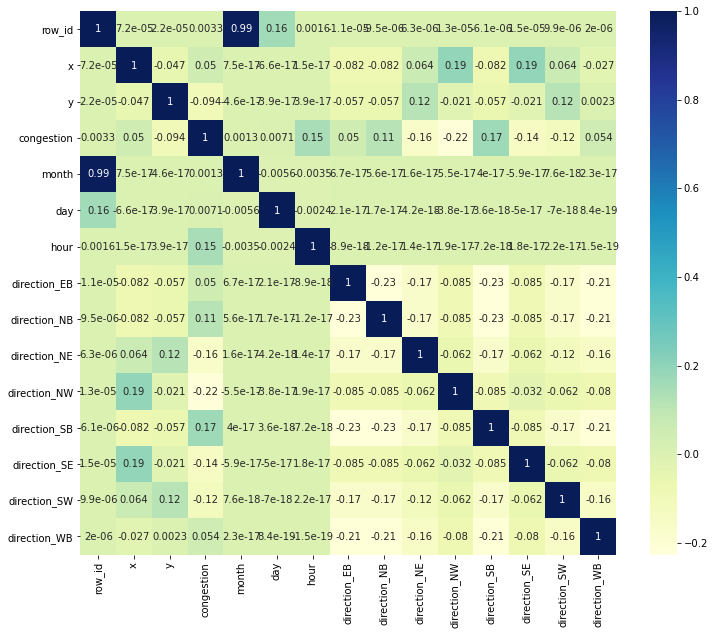

In [219]:
fig, ax = plt.subplots(figsize=(12,10)) 
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
#sb.heatmap(df.corr(), annot=True)
plt.show()

In [215]:
df.row_id.unique()

array([     0,      1,      2, ..., 848832, 848833, 848834], dtype=int64)